In [316]:
import numpy as np
import pandas as pd
import datetime
import warnings; warnings.simplefilter('ignore')
import math as math
import xgboost as xgb 
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [317]:
df = pd.read_excel('MSFT_5DAY.xlsx')

In [318]:
df_test = pd.read_excel('AAPL_5DAY.xlsx')
df_test = df_test.head(130)

In [319]:
#Discard rows and columns containing null values
df = df.dropna(how='any')

In [320]:
#sort by date
df = df.sort_values(by='DATE')
df_test= df_test.sort_values(by='DATE')

In [321]:
choose_factor = [i for i in df.columns if i not in ['DATE','CLOSETOMORROW','ZSPREADTOMORROW']]

In [322]:
choose_feature = df[choose_factor]
choose_feature_test = df_test[choose_factor]

In [323]:
choose_label = df['ZSPREADTOMORROW']
choose_label_test = df_test['ZSPREADTOMORROW']

In [324]:
x_train = choose_feature
y_train = choose_label
x_test = choose_feature_test
y_test = choose_label_test

In [325]:
## random forest

In [326]:
# from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [327]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Train a random forest to solve regression problems
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=200)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

# Evaluate regression performance
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2 Score of random forest model：\n",r2_score(y_test,y_pred))

Mean Absolute Error: 2.2357027307692245
Mean Squared Error: 8.884308038394776
Root Mean Squared Error: 2.9806556390154793
R^2 Score of random forest model：
 0.8722779226778932


In [328]:
importances = forest.feature_importances_ 
importances_df = pd.DataFrame([choose_factor, importances], index=['Features', 'Importances']).T
importances_df.sort_values(by='Importances',ascending=False).head(10)

,Features,Importances
5,ZSPREAD0,0.762445
11,ZSPREAD1,0.106668
17,ZSPREAD2,0.0326816
3,CLOSE0,0.0188641
4,YTM0,0.0125868
20,LOW3,0.00697488
23,ZSPREAD3,0.00634975
2,LOW0,0.00617888
29,ZSPREAD4,0.00514584
22,YTM3,0.00440136


<AxesSubplot:>

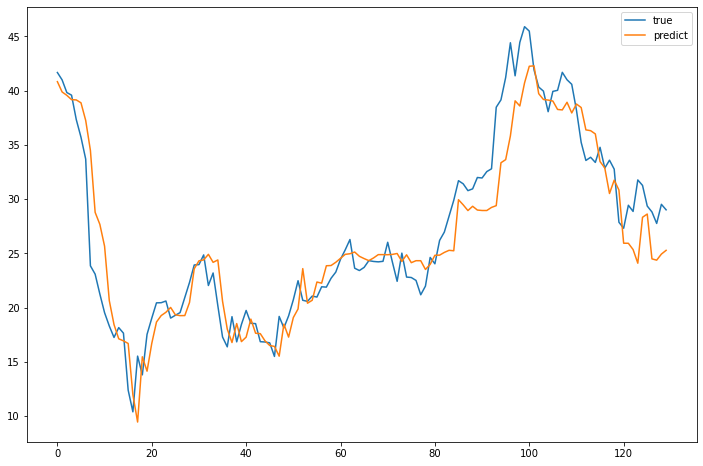

In [329]:
plots = pd.DataFrame(y_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

In [330]:
## LinearRegression

In [331]:
from sklearn.linear_model import LinearRegression  # 线性回归
linearmodel = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linearmodel.fit(x_train,y_train)   # 线性回归建模
predicted = linearmodel.predict(x_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("R^2 Score of linear model：\n",r2_score(y_test,predicted))

Mean Absolute Error: 4.633429416272309
Mean Squared Error: 33.91856547124259
Root Mean Squared Error: 5.823964755322836
R^2 Score of linear model：
 0.512381873405222


<AxesSubplot:>

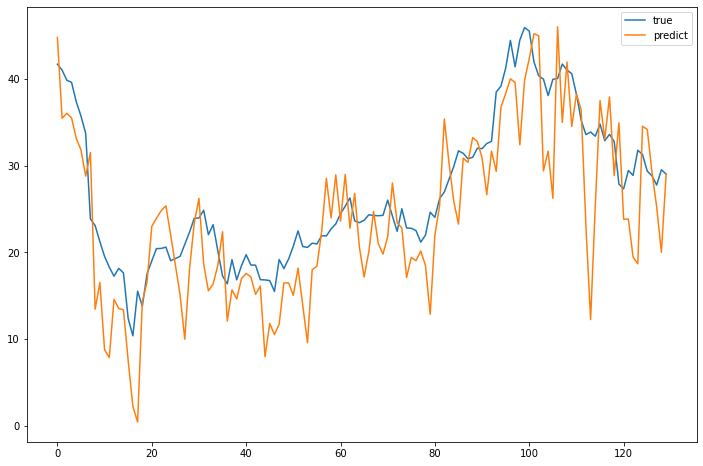

In [332]:
plots = pd.DataFrame(predicted,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

In [333]:
##ridge model

In [334]:
from sklearn.linear_model import Ridge
ridgemodel = Ridge(alpha=10)
ridgemodel.fit(x_train,y_train)   # 线性回归建模
ridge_pred = ridgemodel.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print("R^2 Score of ridge model：\n",r2_score(y_test,ridge_pred))

Mean Absolute Error: 2.966264620348586
Mean Squared Error: 12.349399221437446
Root Mean Squared Error: 3.5141711997905634
R^2 Score of ridge model：
 0.8224632784651864


<AxesSubplot:>

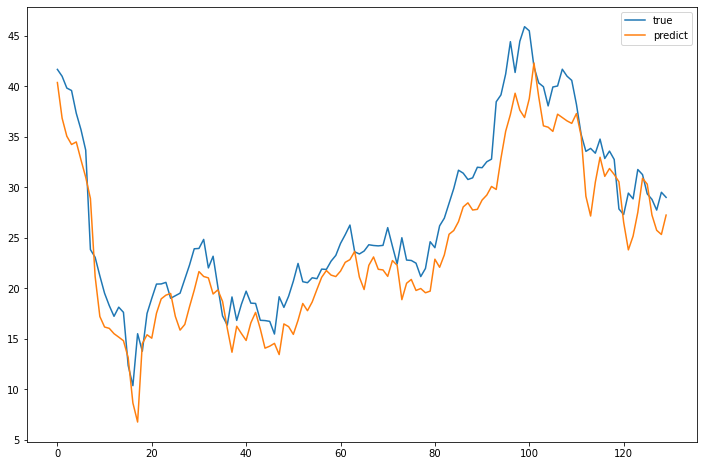

In [335]:
plots = pd.DataFrame(ridge_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

In [336]:
#KNN

In [337]:
from sklearn import neighbors
KNN_model = neighbors.KNeighborsRegressor()
KNN_model.fit(x_train,y_train)
KNN_pred = KNN_model.predict(x_test)

print('Mean Absolute Error of KNN_model:', metrics.mean_absolute_error(y_test, KNN_pred))
print('Mean Squared Error of KNN_model:', metrics.mean_squared_error(y_test, KNN_pred))
print('Root Mean Squared Error of KNN_model:',np.sqrt(metrics.mean_squared_error(y_test, KNN_pred)))
print("R^2 Score of KNN model：",r2_score(y_test,KNN_pred))

Mean Absolute Error of KNN_model: 13.234504615384616
Mean Squared Error of KNN_model: 237.71376818092307
Root Mean Squared Error of KNN_model: 15.41796900311202
R^2 Score of KNN model： -2.4174069774396214


<AxesSubplot:>

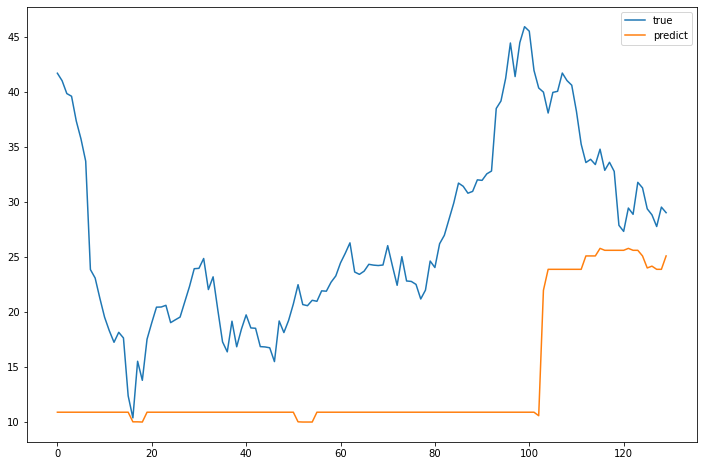

In [338]:
plots = pd.DataFrame(KNN_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

In [339]:
#SVM

In [340]:
from sklearn.svm import SVR
#线性核函数 Linear kernel function
lin_svr = SVR(kernel='linear')
lin_svr.fit(x_train,y_train)
lin_svr_pred=lin_svr.predict(x_test)
print('Mean Absolute Error of lin_svr:', metrics.mean_absolute_error(y_test, lin_svr_pred))
print('Mean Squared Error of lin_svr:', metrics.mean_squared_error(y_test, lin_svr_pred))
print('Root Mean Squared Error of lin_svr:',np.sqrt(metrics.mean_squared_error(y_test, lin_svr_pred)))
print("R^2 Score of lin_svr：\n",r2_score(y_test,lin_svr_pred))

#多项式核函数 Polynomial kernel function
poly_svr = SVR(kernel='poly')
poly_svr.fit(x_train,y_train)
poly_svr_pred=poly_svr.predict(x_test)
print('Mean Absolute Error of poly_svr:', metrics.mean_absolute_error(y_test, poly_svr_pred))
print('Mean Squared Error of poly_svr:', metrics.mean_squared_error(y_test, poly_svr_pred))
print('Root Mean Squared Error of poly_svr:',np.sqrt(metrics.mean_squared_error(y_test, poly_svr_pred)))
print("R^2 Score of poly_svr：\n",r2_score(y_test,poly_svr_pred))

#径向基核函数
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(x_train,y_train)
rbf_svr_pred=rbf_svr.predict(x_test)
print('Mean Absolute Error of rbf_svr:', metrics.mean_absolute_error(y_test, rbf_svr_pred))
print('Mean Squared Error of rbf_svr:', metrics.mean_squared_error(y_test, rbf_svr_pred))
print('Root Mean Squared Error of rbf_svr:',np.sqrt(metrics.mean_squared_error(y_test, rbf_svr_pred)))
print("R^2 Score of rbf_svr：\n",r2_score(y_test,rbf_svr_pred))

Mean Absolute Error of lin_svr: 1.915130718857809
Mean Squared Error of lin_svr: 5.90776557799362
Root Mean Squared Error of lin_svr: 2.4305895535844013
R^2 Score of lin_svr：
 0.9150691208935485
Mean Absolute Error of poly_svr: 10.572413513704994
Mean Squared Error of poly_svr: 202.7475786166826
Root Mean Squared Error of poly_svr: 14.238945839375983
R^2 Score of poly_svr：
 -1.914728057721494
Mean Absolute Error of rbf_svr: 14.674655177358597
Mean Squared Error of rbf_svr: 267.07768348757276
Root Mean Squared Error of rbf_svr: 16.34251154160745
R^2 Score of rbf_svr：
 -2.839546804769757


<AxesSubplot:>

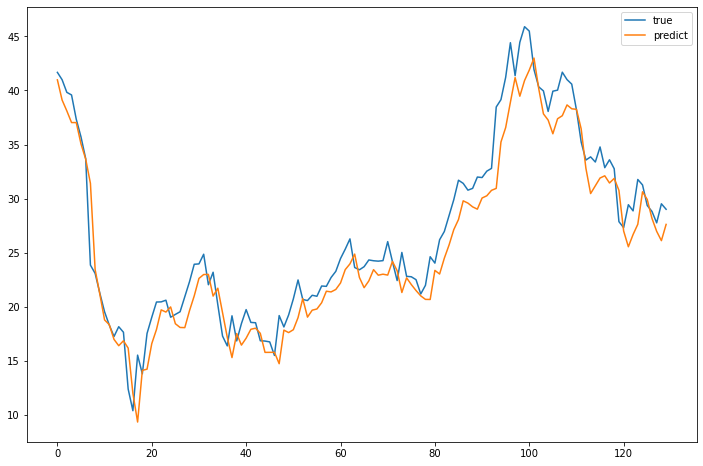

In [341]:
plots = pd.DataFrame(lin_svr_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

<AxesSubplot:>

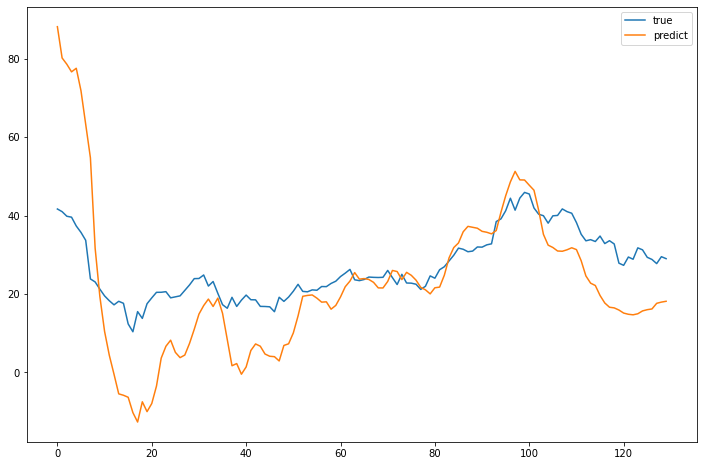

In [342]:
plots = pd.DataFrame(poly_svr_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

<AxesSubplot:>

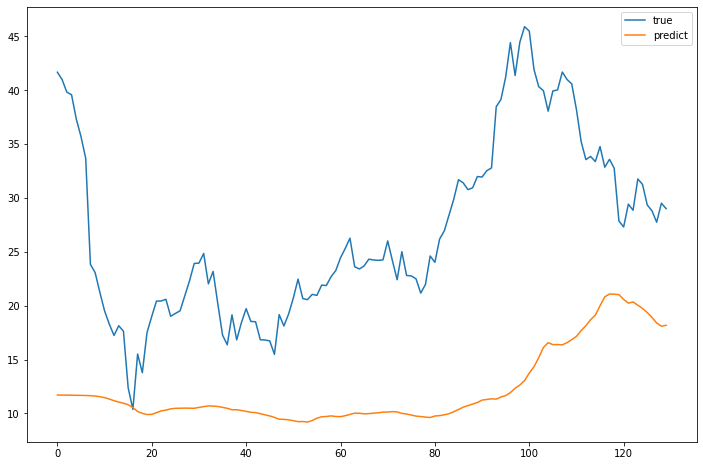

In [343]:
plots = pd.DataFrame(rbf_svr_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))

In [344]:
#ANN

In [345]:
from sklearn.neural_network import MLPClassifier
ANN=MLPClassifier()
ANN.fit(x_train,y_train.astype('int'))
ANN_pred=ANN.predict(x_test)

print('Mean Absolute Error of ANN_model:', metrics.mean_absolute_error(y_test, ANN_pred))
print('Mean Squared Error of ANN_model:', metrics.mean_squared_error(y_test, ANN_pred))
print('Root Mean Squared Error of ANN_model:',np.sqrt(metrics.mean_squared_error(y_test, ANN_pred)))
print("R^2 Score of ANN model：",r2_score(y_test,ANN_pred))

Mean Absolute Error of ANN_model: 7.346961538461539
Mean Squared Error of ANN_model: 80.17672103846154
Root Mean Squared Error of ANN_model: 8.954145466679751
R^2 Score of ANN model： -0.1526319573401016


<AxesSubplot:>

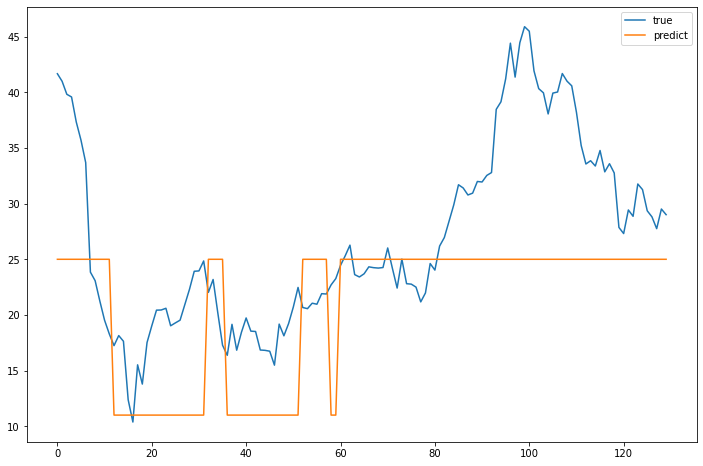

In [346]:
plots = pd.DataFrame(ANN_pred,y_test).reset_index()
plots.columns = ['true','predict']
plots.plot(figsize=(12,8))